## TODO

* ### Utility Functions for CH 18

In [208]:
def fill_list(n=1000) -> list[int]:
    import random
    random_ints = [random.randint(1, 1000) for _ in range(n)]
    return random_ints

#basic length test
def test_lists_lengths(a: list[int], b:list[int])-> bool:
    if len(a) == len(b): return True
    else: return False

#basic function to make sure that the values in one list occur the exact number of times
def test_lists_count(a: list[int], b:list[int])-> bool: # type: ignore
    for i in range(0, len(sorted_list)):
        if a.count(a[i]) == b.count(a[i]):
            return True
        else:
            return False

# relies on test_lists_count passing successfully
def test_lists_contents(a: list[int], b:list[int])-> bool:
    for i in range(0, len(a)):
        #get count of items from list a for current index
        #make sure the item occurs n times in list b
        a_c = a.count(a[i])
        b_c = 0
        
        #run through list b finding all matching values
        # increment the b_c counter on match
        for j in range(0, len(a)):
            if a[i] == b[j] : b_c += 1
        #if there is any mismatch then immediately fail it
        if a_c != b_c: return False
 
    return True

#Suite main func
def test_suite_run(a: list[int], b:list[int])-> bool:
    success = False
    
    try: 
        success = test_lists_lengths(a,b)
        if success == False: raise Exception()
    except: print("Exception: test_lists_lengths")
    else: print("test_lists_lengths : Pass = ", success )
    
    try:
        success = test_lists_count(a,b)
        if success == False: raise Exception()
    except: print("Exception: test_lists_count")
    else: print("test_lists_count: Pass = " , success)
    
    try:        
        success = test_lists_contents(a,b)
        if success == False: raise Exception()
    except: print("Exception: test_lists_contents")
    else: print("test_lists_contents: Pass = " , success)
    
    return success

#main function to run the comparison suite on the sorted and unsorted arrays
def run_array_suite(_unsorted_list: list=[None], sorting_func=None, *args, printRange: int=20):
  
    """
    Run suite of functions to compare contents of the sorted and unsorted lists.
    Accepts 
    
    Parameter
    ---------
    _unsorted_list : list
       The list to be sorted. This will be treated as immutable.
    
    sorting_func : None
        The function which will be used in testing.
    
    *args 
        Any additional arguments that must be passed to the sorting_func
        
    printRange: int = 20
        Sets the print length on output. Helps with large lists.
         
    """
    
    # Make a copy. 
    # The copy will be sorted in the next function call.
    sorted_list = _unsorted_list.copy()
    # Execute the sorting function
    sorting_func(sorted_list, *args)
    
    test_passed = test_suite_run(sorted_list, _unsorted_list)
    
    print ("sorted: ", sorted_list[:printRange]) # Truncated output
    print ("unsort: ", _unsorted_list[:printRange]) # Truncated output
    print("test_suite: Pass = " , test_passed)
    
 #   if test_passed: 
   #     %timeit -r 4 -n 3 sorting_func(fill_list(len(_unsorted_list)), shell_sort_generate_gaps(fill_length))





**Prepare lists**

In [80]:
fill_length = 10000
unsorted_list: list[int] = fill_list(fill_length)
# print(unsorted_list)
sorted_list = unsorted_list.copy() #copy so we can use both later for comparison

 ## 18.4 Shell Sort

**Shell Sort** uses a variant of *insertion sort*. It splits a list into **`n`** <u> interleaved lists</u> and sorts them individualy. It then merges the lists back together to obtain a semi-sorted list which can then be fully sorted. This process requires fewer swaps than using simple insertion sort.

What is the method of spliting the list? It's a basic gap method. We use a **gap_value** to split up the list. A gap_value of 3 will split the list into 3 interleaved lists. They are interleaved because we select every 3rd element to put into the list. We start at i=0 and increment in i+=3. For the next interleaved list we start at i=1 and increment in i+=3 and so on untill we build our 3 lists. 

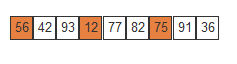
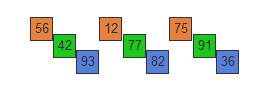

After we run the insertion sort algo on the lists and then merge the results back using the same interleaving pattern. Finally, run insertion sort on the complete list.

P.S. - The list length does not matter when interleaving. Just dont make the `gap_value > len(list)`

<Explain the logic such as what the loops are doing>

- ### Runtime Complexity of $O(n^{\frac{3}{2}})$

In [81]:
# returns True or False. False should only be returned if we receive no list
def insertion_sort_interleaved(a: list[int] = [], idx: int = 0, gap: int = 0) -> bool:
    if not a: return False
    for i in range(0+idx+gap, len(a), gap):
        j=i
        # print (gap)
        while (j - gap)>= idx and a[j] < a[j-gap]:
            k=j-gap
            temp = a[j]
            a[j] = a[k]
            a[k] = temp
            j -= gap
            
# Main shell sort call
def shell_sort(a: list[int] = [], gap_values: list[int] = []) -> None:
    if not a: return False
    for i,j in enumerate(gap_values): # (idx, value)
        for k in range(0, j):
            insertion_sort_interleaved(a, k, j)
            # print(k, j)



In [82]:
import math

In [83]:
def shell_sort_generate_gaps(k: [int] = 100):
    a = list(reversed([2**i - 1 for i in range(math.floor(math.sqrt(k))) if (2**i - 1 < k)]))
    return a[:-1] #ommit last value. dont want 0
# shell_sort(sorted_list, )

In [84]:
print (shell_sort_generate_gaps(fill_length))

[8191, 4095, 2047, 1023, 511, 255, 127, 63, 31, 15, 7, 3, 1]


In [85]:
shell_sort(sorted_list, shell_sort_generate_gaps(fill_length))

In [86]:
print(sorted_list[:10])

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2]


In [87]:
run_array_suite(unsorted_list, shell_sort, shell_sort_generate_gaps(fill_length))

test_lists_lengths : Pass =  True
test_lists_count: Pass =  True
test_lists_contents: Pass =  True
sorted:  [1, 1, 1, 1, 1, 1, 1, 2, 2, 2]
unsort:  [657, 901, 432, 810, 451, 820, 571, 925, 35, 674]
test_suite: Pass =  True


## 18.5 Quicksort

### The Partitioning Algorithm
- This algorithm splits an array into two, a *low and a high part*, using a **pivot** value. The **pivot** value is chosen based on some rule. Usually it is the *middle value of the array*.
- Once the pivot is chosen, all the values less than the pivot are moved into the *low part* and all the values higher than the pivot move to the *high part*. 
  - We say that this array has been **Partitioned** 
- The algorithm first runs a **Partition** function which consists of a **while** loop, two inner **while** loops to move the indices, and a logical check for index overlap or pass-over.
- The **main** **while** loop moves the *low and a high* variable to find the first occurence of numbers higher or lower than the **pivot** value. Next, a logical check is done for index overlap or pass-over. This means there is nothing left to partition. *Else*, use a temp value to swap out values located at *low and high* indices. Then proceed to inc/dec the indices once.
  - This process repeats untill the logical check sets a breaking condition for the **main** **while** loop

### The Quicksort Algorithm

In [88]:
import math
def quicksort_partition(a: list[int] = [], lo: int = 0, hi: int = 0) -> int:
    
    mid = lo + (hi- lo)//2
    pivot = a[mid]
    
    # print("lo, hi; mid, pivot", lo, hi, mid, pivot)
    # print("list", a)
    while (True):
        while a[lo] < pivot: lo += 1
        while a[hi] > pivot: hi -= 1
        
        if( lo>= hi): break
        else:
            temp = a[lo]
            a[lo] = a[hi]
            a[hi] = temp
            lo += 1
            hi -=1

    return hi

def quicksort(a: list[int] = [], lo: int = 0, hi: int = 0):
    if(lo >= hi):
        return
    
    lohi = quicksort_partition(a, lo, hi)
    quicksort(a, lo, lohi)
    quicksort(a, lohi+1, hi)
    



In [89]:
unsorted_list = fill_list(50)
sorted_list = unsorted_list.copy()
#quicksort_partition(sorted_list)

print("init", sorted_list[:10]) # Truncated output
quicksort(sorted_list, 0, len(sorted_list)-1)
print ("done", sorted_list[:10]) # Truncated output

init [552, 164, 965, 37, 907, 524, 640, 495, 356, 64]
done [3, 37, 47, 64, 64, 66, 133, 145, 155, 164]


### Quicksort testing

In [90]:

x = 10000

unsorted_list = fill_list(x)

run_array_suite(unsorted_list, quicksort, 0, x-1)

test_lists_lengths : Pass =  True
test_lists_count: Pass =  True
test_lists_contents: Pass =  True
sorted:  [1, 1, 1, 1, 1, 1, 1, 1, 2, 2]
unsort:  [756, 801, 487, 520, 483, 359, 426, 509, 638, 712]
test_suite: Pass =  True


## 18.7 Radix Sort

This algorithm is for intiger sorting. It sorts it by bucketing values by decimal place. The bucketing starts at the 1's place and moves to 10's and 100's and so on. This is calculated using $(n/10^i)\, mod \, 10$. \
$n$ is the value we're checking \
$i$ is the power of 10 as the divisor. Starts at 0 for the 1's place and moves up to the largest power that we find in the array from the initial peek at the values. \
$ mod\, 10$ computes the remainder for that specific power we're checking. \
This naturally extends to other base systems where instead of $10^i$ we may do $b^i$ and using $mod \, b_{divisor}$.\
Ex: $n//\set{1,16,256,...}\, mod \, 16$ for hexdecimal system. 

Keyword: Lexicographic sorting


In [207]:
# radix sort for integers.
def radix_sort(a: list[int], base: int = 10) -> None:
    """
    Performs Radix Sort on a list of integers.
    
    Parameters
    ---------
    a : list
       The list to be sorted. Mutable.
    
    base: int
        Base sytem for sorting. Base-10 is default.
        *other bases not implemented*
    
    Returns
    --------
    None
         
    """
    b = a
    if base != 10: # Other bases under construction
        return
    
    bucket: list[list[int]] = [[] for _ in range(base)]
    
    largestDigit = 0
    
    for i in range(0, len(b)):
        if(b[i] > largestDigit):
            largestDigit = b[i]
    
    maxPower = int(math.log10(largestDigit)) # round it 
    power = 1
    # print("maxpower:", maxPower)
    # print("len: ", len(b))
    for i in range(0, maxPower+1):
        # print("bucket:", bucket)
        # print("power:" , power)
        for j in range(0, len(b)):
            # print ("roll idx: ", j)
            idx = int(abs( \
                   b[j] / power % base \
                   ))
            bucket[idx].append(b[j])
            
        n = 0
        # print("bucket:", bucket)
        for j in range(0, len(bucket)):
            for k in range(0, len(bucket[j])):
                b[n] = bucket[j][k]
                n+=1
        # alters reference. Not suitable
        # b = bucket. #[x for sublist in bucket for x in sublist]
        
        power *= 10
        bucket: list[list[int]] = [[] for _ in range(base)]
        

In [206]:
unsorted_list = fill_list(1000)
run_array_suite(unsorted_list, radix_sort, printRange=20)

test_lists_lengths : Pass =  True
test_lists_count: Pass =  True
test_lists_contents: Pass =  True
sorted:  [1, 1, 1, 2, 2, 2, 3, 5, 6, 6, 8, 8, 8, 11, 12, 12, 13, 14, 14, 14]
unsort:  [595, 377, 867, 805, 756, 489, 797, 505, 893, 766, 664, 918, 387, 978, 412, 750, 352, 531, 919, 834]
test_suite: Pass =  True


#### Misc tests

In [ ]:
import random
%timeit -r 5 -n 100 math.log10(random.randint(1, 1000))//1

569 ns ± 33.2 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)


In [ ]:
%timeit -r 5 -n 100 random.randint(1, 1000)//10 %10

505 ns ± 28 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)


In [ ]:
import math

In [ ]:
%timeit -r 5 -n 100 math.log(random.randint(1, 1000), 10)//1

645 ns ± 32.4 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)


In [ ]:
int(math.log10(999)//1)
int()

2

In [ ]:
abs(53/10 % 10)//1

5.0

In [173]:

for i in range(0,0):
    print(i)

In [172]:
a = [[],[1]]
len(a[1])

1

In [ ]:
def testing(base = 10):
    largestDigit = random.randint(1,1000)
    if base == 10:
        maxPower = int(math.log10(largestDigit)//1) # round it 
        # largestDigit//10 %10
    elif base == 2:
        maxPower = int(math.log2(largestDigit)//1)
    else:    
        maxPower = int(math.log(largestDigit, base)//1)

In [ ]:
%timeit -r 100 -n 100 testing(10)

554 ns ± 7.74 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [ ]:
%timeit -r 100 -n 100 random.randint(1, 1000)//10 %10

486 ns ± 7.14 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [160]:
bucket = [[1, 2], [3, 4], [5, 6]]
a = [x for sublist in bucket for x in sublist]
a


[1, 2, 3, 4, 5, 6]

In [161]:
len(bucket)

3